In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from numpy import mean
from numpy import std
from tensorflow.keras import Sequential

from keras.models import Model
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Input
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Bidirectional, LSTM, Dropout, Dense

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
path = 'pamap2.csv'
data = pd.read_csv(path)

In [160]:
data

,Unnamed: 0,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,2932,37.70,1,100.0,30.3750,2.301060,7.25857,6.09259,2.207200,7.24042,...,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847,1.000000,0.000000,0.000000,0.000000,1
1,2943,37.81,1,100.0,30.3750,2.246150,7.48180,5.55219,2.251300,7.40595,...,-0.017912,0.015243,-60.7820,-36.2116,-58.4891,1.000000,0.000000,0.000000,0.000000,1
2,2954,37.92,1,100.0,30.3750,2.300000,7.10681,6.09309,2.346130,7.46611,...,-0.011798,0.011387,-61.4531,-36.2983,-58.4845,1.000000,0.000000,0.000000,0.000000,1
3,2965,38.03,1,100.0,30.3750,2.494550,7.52335,6.17157,2.591060,7.76653,...,-0.009233,0.005823,-62.0065,-36.7217,-58.3608,1.000000,0.000000,0.000000,0.000000,1
4,2976,38.14,1,101.0,30.3750,2.716540,8.30596,4.78671,2.595960,7.94641,...,-0.042562,-0.009289,-60.4311,-37.5412,-59.0013,1.000000,0.000000,0.000000,0.000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118511,2818402,3629.66,5,195.0,30.8125,0.565086,2.59595,9.27677,0.660681,2.70904,...,-0.002287,-0.017737,-17.6912,12.0079,26.5782,0.164776,0.798149,0.227263,0.533065,8
118512,2818413,3629.77,5,195.0,30.8125,0.570697,2.82459,9.39155,0.495537,2.75557,...,-0.007246,0.007512,-17.6928,12.0076,26.4364,0.166393,0.797223,0.228965,0.533221,8
118513,2818423,3629.87,5,195.0,30.8125,0.756704,2.78452,9.31749,0.781122,2.72325,...,0.003818,0.017649,-17.9459,11.7619,26.1521,0.166735,0.797039,0.229771,0.533041,8
118514,2818435,3629.99,5,195.0,30.8125,0.530504,2.67279,9.35297,0.540382,2.87591,...,-0.003649,-0.002610,-18.2103,12.4200,26.5759,0.168936,0.795763,0.231222,0.533628,8


In [161]:
data['activityID'].value_counts()

4     20998
1     17575
3     17256
2     16881
7     16857
12    10699
13     9585
5      8665
Name: activityID, dtype: int64

In [162]:
from sklearn import preprocessing

# Define column name of the label vector
LABEL = "activityID"
# Transform the labels from String to Integer via LabelEncoder
le = preprocessing.LabelEncoder()
# Add a new column to the existing DataFrame with the encoded values
data[LABEL] = le.fit_transform(data["activityID"].values.ravel())

In [163]:
data['activityID'].value_counts()

3    20998
0    17575
2    17256
1    16881
5    16857
6    10699
7     9585
4     8665
Name: activityID, dtype: int64

In [158]:
data['heartrate'] = data['heartrate'].fillna(data['heartrate'].mean())
data = data.dropna()
data = data.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                  'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                  'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                axis = 1)  # removal of orientation columns as the
data = data.drop('Unnamed: 0', axis = 1)             
print('Invalid values in train = {}'.format(data.isnull().values.sum()))
data.isnull().sum()

Invalid values in train = 0


timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

In [164]:
from sklearn.preprocessing import StandardScaler

X = data[['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3']]
y= data['activityID']

scaler = StandardScaler()
X = scaler.fit_transform(X)

data = pd.DataFrame(data = X, columns = ['handAcc16_1' , 'handAcc16_2' , 'handAcc16_3' ,
    'handAcc6_1' , 'handAcc6_2' , 'handAcc6_3' ,
    'handGyro1' , 'handGyro2',   'handGyro3' ,      
    'handMagne1',  'handMagne2' , 'handMagne3',  
    'chestAcc16_1', 'chestAcc16_2',  'chestAcc16_3',   
    'chestAcc6_1',  'chestAcc6_2',  'chestAcc6_3',
    'chestGyro1',   'chestGyro2',   'chestGyro3',    
    'chestMagne1', 'chestMagne2' , 'chestMagne3', 
    'ankleAcc16_1',   'ankleAcc16_2',  'ankleAcc16_3',
    'ankleAcc6_1',  'ankleAcc6_2',  'ankleAcc6_3',   
    'ankleGyro1' ,   'ankleGyro2',   'ankleGyro3',    
    'ankleMagne1' , 'ankleMagne2' ,'ankleMagne3'])
data['activityID'] = y.values

In [165]:
data.columns

Index(['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'chestAcc16_1', 'chestAcc16_2',
       'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3',
       'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1', 'chestMagne2',
       'chestMagne3', 'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3',
       'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 'ankleGyro1', 'ankleGyro2',
       'ankleGyro3', 'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
       'activityID'],
      dtype='object')

In [166]:
hfeature = data[['handAcc16_1', 'handAcc16_2', 'handAcc16_3', 'handAcc6_1', 'handAcc6_2',
       'handAcc6_3', 'handGyro1', 'handGyro2', 'handGyro3', 'handMagne1',
       'handMagne2', 'handMagne3', 'activityID']]
cfeature = data[['chestAcc16_1','chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1', 'chestAcc6_2',
       'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3', 'chestMagne1',
       'chestMagne2', 'chestMagne3', 'activityID']]

In [195]:
hand_X_data = hfeature.drop(['activityID'], axis = 1)
hand_y_data = hfeature['activityID']

chest_X_data = cfeature.drop(['activityID'], axis = 1)
chest_y_data = cfeature['activityID']

In [198]:
from scipy import stats

def create_dataset(X, y, time_steps=1, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        v = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(v)        
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)


In [197]:
#TIME_STEPS : The length of the time segment.
#STEP : Determines the amount of overlap between two consecutive time segments.
    
    
TIME_STEPS = 40
STEP = 10

In [196]:
hand_X_data , hand_y_data = create_dataset(hand_X_data, hand_y_data, TIME_STEPS, STEP)

chest_X_data, chest_y_data = create_dataset(chest_X_data, chest_y_data, TIME_STEPS, STEP)


C:\Users\procns\AppData\Local\Temp\ipykernel_16076\2621145521.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  ys.append(stats.mode(labels)[0][0])


In [199]:
hand_X_train, hand_X_test, hand_y_train, hand_y_test = train_test_split(hand_X_data, hand_y_data, test_size = 0.25, 
                                                    shuffle = True, stratify = hand_y_data)

chest_X_train, chest_X_test, chest_y_train, chest_y_test = train_test_split(chest_X_data, chest_y_data, test_size = 0.25, 
                                                    shuffle = True, stratify = chest_y_data)


In [200]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(hand_y_train)

hand_y_train = enc.transform(hand_y_train)
hand_y_test = enc.transform(hand_y_test)

C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [201]:
enc = OneHotEncoder(handle_unknown = "ignore", sparse = False)
enc = enc.fit(chest_y_train)

chest_y_train = enc.transform(chest_y_train)
chest_y_test = enc.transform(chest_y_test)

C:\Users\procns\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [202]:
#hand_X_train, hand_X_val, hand_y_train, hand_y_val = train_test_split(hand_X_train, hand_y_train, test_size = 0.25, 
#                                                    shuffle = True, stratify = hand_y_train)#

#chest_X_train, chest_X_val, chest_y_train, chest_y_val = train_test_split(chest_X_train, chest_y_train, test_size = 0.25, 
#                                                    shuffle = True, stratify = chest_y_train)


In [203]:
hand_X_train.shape, hand_y_train.shape, hand_X_test.shape, hand_y_test.shape 

((8886, 40, 12), (8886, 8), (2962, 40, 12), (2962, 8))

In [204]:
chest_X_train.shape, chest_y_train.shape, chest_X_test.shape, chest_y_test.shape 

((8886, 40, 12), (8886, 8), (2962, 40, 12), (2962, 8))

# Training

# 1. hand data training

In [205]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 
n_timesteps,n_features,n_outputs=hand_X_train.shape[1],hand_X_train.shape[2],hand_y_train.shape[1]

In [206]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(LSTM(64, input_shape= input_shape, return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(n_outputs, activation='softmax'))


model.summary()
    
 # fit network

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            19712     
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 dense_21 (Dense)            (None, 8)               

In [207]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(hand_X_train,hand_y_train,epochs=epochs,batch_size=batch_size,verbose=verbose)

Epoch 1/10
278/278 [==============================] - 17s 48ms/step - loss: 1.0630 - accuracy: 0.6549
Epoch 2/10
278/278 [==============================] - 14s 52ms/step - loss: 0.5419 - accuracy: 0.8473
Epoch 3/10
278/278 [==============================] - 14s 50ms/step - loss: 0.4443 - accuracy: 0.8792
Epoch 4/10
278/278 [==============================] - 13s 48ms/step - loss: 0.3956 - accuracy: 0.8934
Epoch 5/10
278/278 [==============================] - 14s 49ms/step - loss: 0.3236 - accuracy: 0.9072
Epoch 6/10
278/278 [==============================] - 14s 50ms/step - loss: 0.2952 - accuracy: 0.9154
Epoch 7/10
278/278 [==============================] - 14s 51ms/step - loss: 0.2556 - accuracy: 0.9273
Epoch 8/10
278/278 [==============================] - 15s 56ms/step - loss: 0.2532 - accuracy: 0.9291
Epoch 9/10
278/278 [==============================] - 16s 56ms/step - loss: 0.2439 - accuracy: 0.9297
Epoch 10/10
278/278 [==============================] - 19s 69ms/step - loss: 0.221

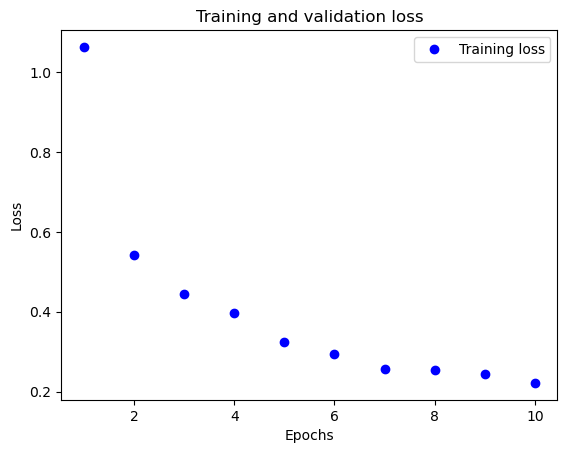

In [208]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

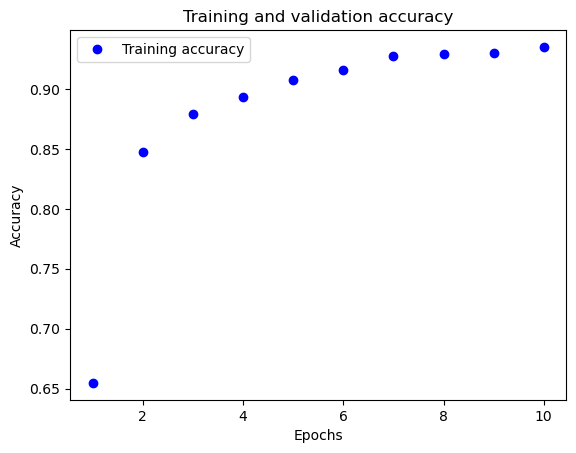

In [209]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

In [210]:
base_loss,base_accuracy=model.evaluate(hand_X_test,hand_y_test,batch_size=batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

93/93 [==============================] - 3s 24ms/step - loss: 0.2369 - accuracy: 0.9257
Accuracy >92.572588
Base Loss >0.24


93/93 [==============================] - 3s 19ms/step
f1 score :  0.9223708252565794


<Axes: >

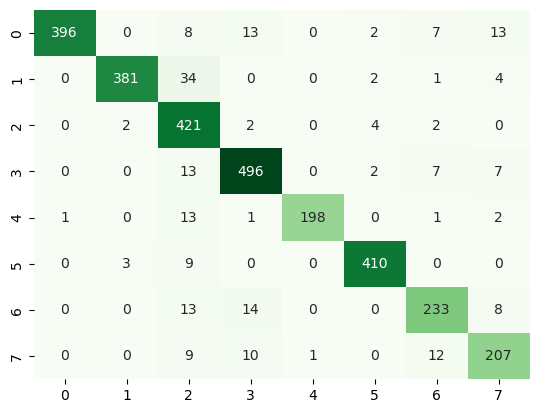

In [211]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = model.predict(hand_X_test)
len(pred_cnn)
y_true = np.argmax(hand_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# training : hand , test = chest

93/93 [==============================] - 2s 22ms/step
f1 score :  0.2581625481436639


<Axes: >

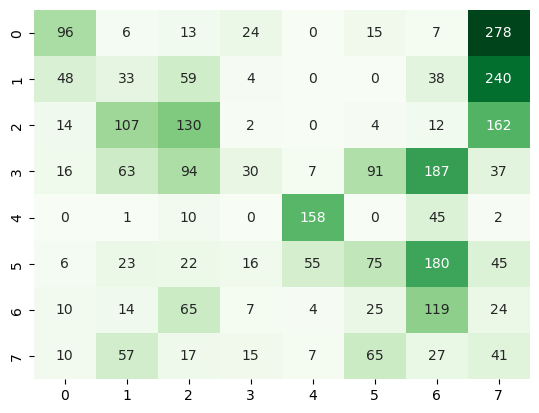

In [212]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = model.predict(chest_X_test)
len(pred_cnn)
y_true = np.argmax(chest_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

In [213]:
cnn_file='CNN_Model.h5'
  
tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
print('model saved at ', cnn_file)

model saved at  CNN_Model.h5


# chest_training

In [249]:
input_shape=(n_timesteps,n_features)
model = Sequential()
model.add(LSTM(64, input_shape= input_shape, return_sequences = True))
model.add(LSTM(128))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(n_outputs, activation='softmax'))


model.summary()
    
 # fit network

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 40, 64)            19712     
                                                                 
 lstm_9 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                8256      
                                                                 
 dense_32 (Dense)            (None, 64)                4160      
                                                                 
 dropout_13 (Dropout)        (None, 64)                0         
                                                                 
 dense_33 (Dense)            (None, 8)               

In [251]:
#Epoch 500

verbose,epochs,batch_size=1,10,32 
n_timesteps,n_features,n_outputs=chest_X_train.shape[1],chest_X_train.shape[2],chest_y_train.shape[1]

In [252]:
model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(chest_X_train,chest_y_train,epochs=epochs,batch_size=batch_size,verbose=verbose)

Epoch 1/10
278/278 [==============================] - 23s 64ms/step - loss: 1.0988 - accuracy: 0.5972
Epoch 2/10
278/278 [==============================] - 19s 67ms/step - loss: 0.6257 - accuracy: 0.7672
Epoch 3/10
278/278 [==============================] - 19s 67ms/step - loss: 0.4820 - accuracy: 0.8274
Epoch 4/10
278/278 [==============================] - 18s 66ms/step - loss: 0.3877 - accuracy: 0.8804
Epoch 5/10
278/278 [==============================] - 19s 69ms/step - loss: 0.3052 - accuracy: 0.9115
Epoch 6/10
278/278 [==============================] - 18s 66ms/step - loss: 0.2657 - accuracy: 0.9243
Epoch 7/10
278/278 [==============================] - 18s 66ms/step - loss: 0.2361 - accuracy: 0.9317
Epoch 8/10
278/278 [==============================] - 18s 64ms/step - loss: 0.1863 - accuracy: 0.9447
Epoch 9/10
278/278 [==============================] - 17s 60ms/step - loss: 0.1818 - accuracy: 0.9465
Epoch 10/10
278/278 [==============================] - 17s 62ms/step - loss: 0.154

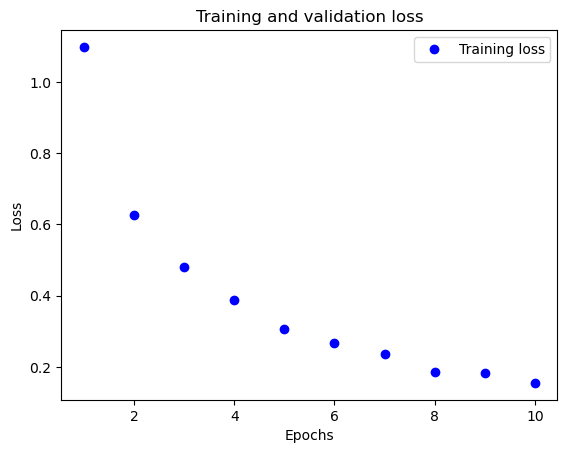

In [253]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
#val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
#plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

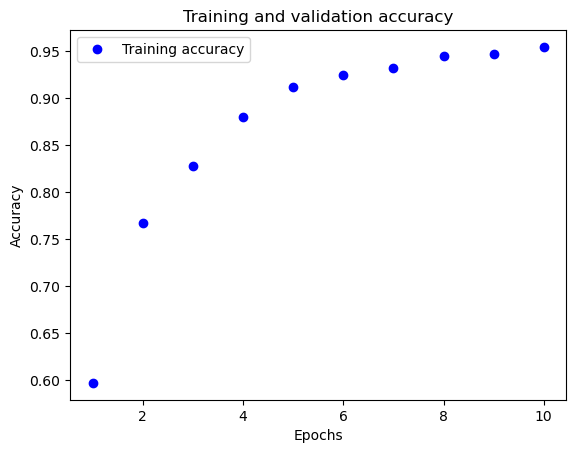

In [254]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
accuracy_values = history_dict['accuracy'] 
#val_accuracy_values = history_dict['val_accuracy']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, accuracy_values, 'bo', label='Training accuracy') 
#plt.plot(epochs, val_accuracy_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy') 
plt.xlabel('Epochs')
plt.ylabel('Accuracy') 
plt.legend()
plt.show()

93/93 [==============================] - 3s 29ms/step
f1 score :  0.9336497682510421


<Axes: >

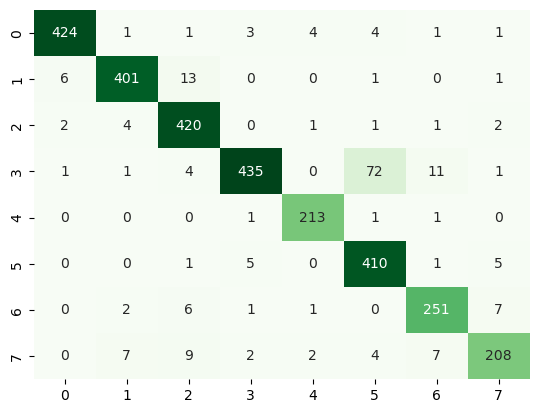

In [256]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = model.predict(chest_X_test)
len(pred_cnn)
y_true = np.argmax(chest_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# training : chest , testing = hand

93/93 [==============================] - 3s 30ms/step
f1 score :  0.29727333040311826


<Axes: >

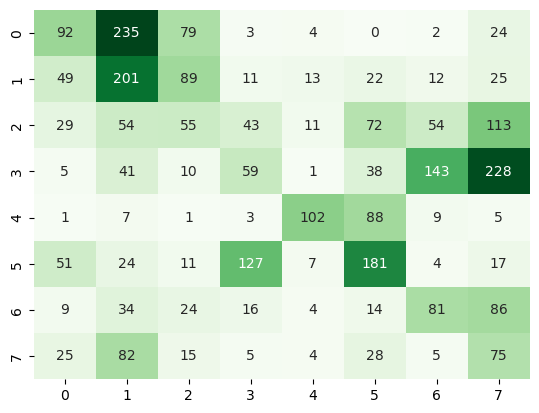

In [257]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = model.predict(hand_X_test)
len(pred_cnn)
y_true = np.argmax(hand_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# Fine tuning

In [237]:
# Base 모델을 로드

base_model = keras.models.load_model(cnn_file)

In [238]:
new_model = keras.models.Sequential(base_model.layers[:-1])
base_model.trainable = False
new_model.add(keras.layers.Flatten())

new_model.add(Dense(n_outputs, activation='softmax'))

new_model.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 40, 64)            19712     
                                                                 
 lstm_7 (LSTM)               (None, 128)               98816     
                                                                 
 dropout_10 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256      
                                                                 
 dense_20 (Dense)            (None, 64)                4160      
                                                                 
 dropout_11 (Dropout)        (None, 64)                0         
                                                                 
 flatten_14 (Flatten)        (None, 64)              

In [239]:
# 몇번의 에포크 동안 훈련을 하고 나면 동결을 해제하고 
# 새로운 작업 B에 맞게 이 재사용된 층들을 세밀하게 튜닝
# 이때 학습률을 낮춰 가중치가 망가지는 것을 막아야함
new_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])

history = new_model.fit(chest_X_train, chest_y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/10
250/250 [==============================] - 12s 33ms/step - loss: 2.1103 - accuracy: 0.2332 - val_loss: 1.5753 - val_accuracy: 0.4612
Epoch 2/10
250/250 [==============================] - 7s 28ms/step - loss: 1.6997 - accuracy: 0.3765 - val_loss: 1.4455 - val_accuracy: 0.5276
Epoch 3/10
250/250 [==============================] - 7s 29ms/step - loss: 1.5593 - accuracy: 0.4373 - val_loss: 1.3848 - val_accuracy: 0.5501
Epoch 4/10
250/250 [==============================] - 7s 28ms/step - loss: 1.5037 - accuracy: 0.4613 - val_loss: 1.3509 - val_accuracy: 0.5591
Epoch 5/10
250/250 [==============================] - 7s 28ms/step - loss: 1.4530 - accuracy: 0.4817 - val_loss: 1.3174 - val_accuracy: 0.5726
Epoch 6/10
250/250 [==============================] - 7s 29ms/step - loss: 1.4172 - accuracy: 0.4916 - val_loss: 1.3047 - val_accuracy: 0.5759
Epoch 7/10
250/250 [==============================] - 8s 30ms/step - loss: 1.4058 - accuracy: 0.5017 - val_loss: 1.2879 - val_accuracy: 0.561

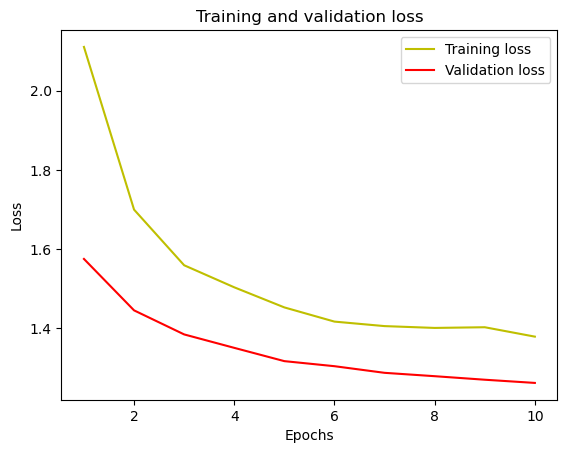

In [240]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

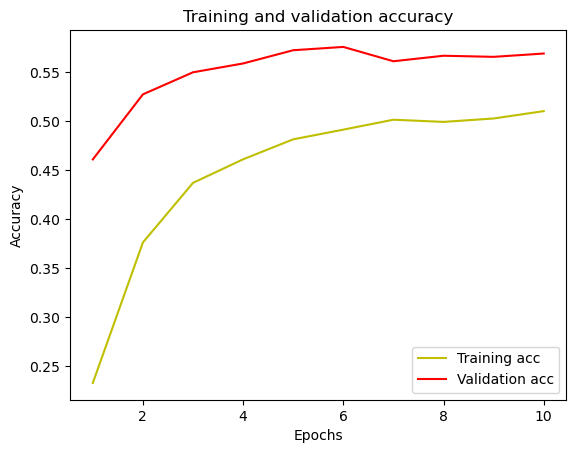

In [241]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 [==============================] - 3s 25ms/step
f1 score :  0.5151589370444767


<Axes: >

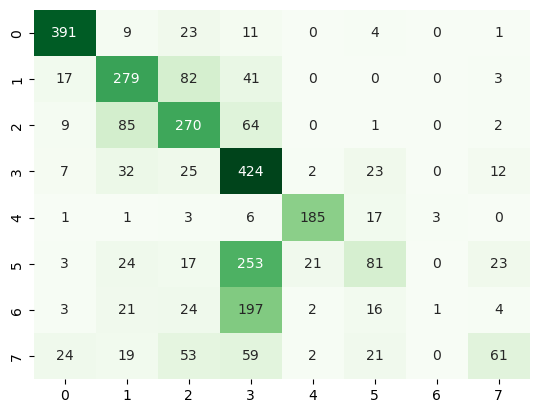

In [242]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = new_model.predict(chest_X_test)
len(pred_cnn)
y_true = np.argmax(chest_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# 동결 해제

In [243]:
for layer in new_model.layers[:-2]:
    layer.trainable = True # 동결 해제
new_model.compile(optimizer=Adam(learning_rate = 0.001), loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = new_model.fit(chest_X_train, chest_y_train, epochs=10, batch_size = 32, validation_split = 0.1, shuffle = True)

Epoch 1/10
250/250 [==============================] - 23s 70ms/step - loss: 0.7480 - accuracy: 0.7347 - val_loss: 0.4474 - val_accuracy: 0.8380
Epoch 2/10
250/250 [==============================] - 17s 67ms/step - loss: 0.4801 - accuracy: 0.8417 - val_loss: 0.3302 - val_accuracy: 0.8898
Epoch 3/10
250/250 [==============================] - 17s 69ms/step - loss: 0.3793 - accuracy: 0.8767 - val_loss: 0.2378 - val_accuracy: 0.9224
Epoch 4/10
250/250 [==============================] - 18s 71ms/step - loss: 0.3079 - accuracy: 0.9060 - val_loss: 0.2152 - val_accuracy: 0.9269
Epoch 5/10
250/250 [==============================] - 18s 72ms/step - loss: 0.2685 - accuracy: 0.9182 - val_loss: 0.2120 - val_accuracy: 0.9336
Epoch 6/10
250/250 [==============================] - 19s 75ms/step - loss: 0.2194 - accuracy: 0.9315 - val_loss: 0.1901 - val_accuracy: 0.9393
Epoch 7/10
250/250 [==============================] - 18s 74ms/step - loss: 0.2006 - accuracy: 0.9380 - val_loss: 0.1463 - val_accuracy:

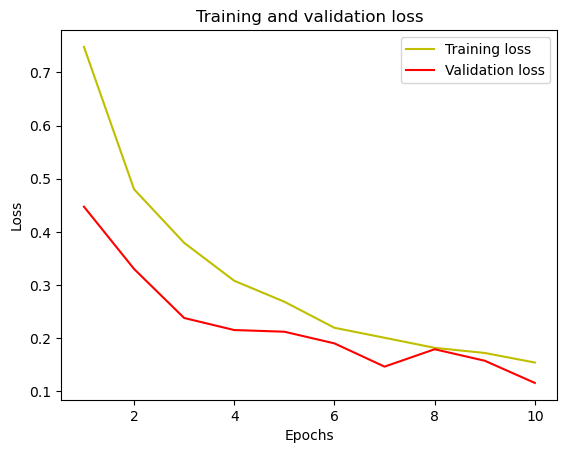

In [244]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

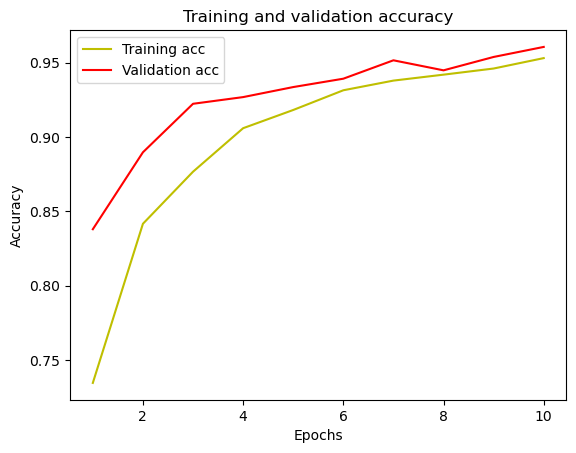

In [245]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

93/93 [==============================] - 4s 27ms/step
f1 score :  0.9450846976526901


<Axes: >

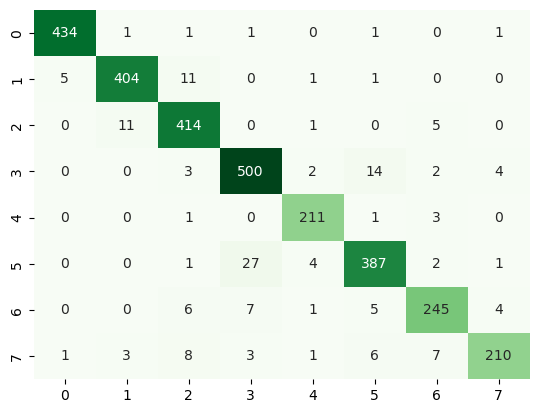

In [246]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = new_model.predict(chest_X_test)
len(pred_cnn)
y_true = np.argmax(chest_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

# training : chest , testing = hand

93/93 [==============================] - 3s 27ms/step
f1 score :  0.2852620405522535


<Axes: >

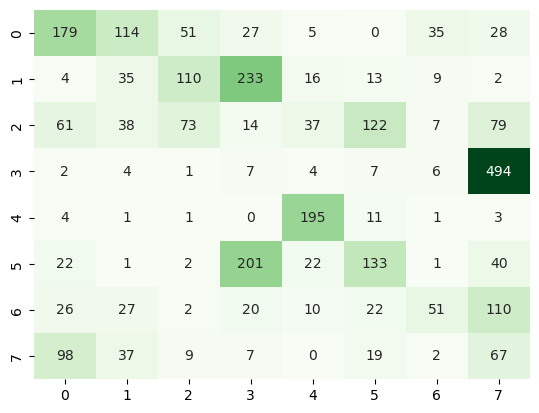

In [247]:
from sklearn.metrics import confusion_matrix
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

pred_cnn = new_model.predict(hand_X_test)
len(pred_cnn)
y_true = np.argmax(hand_y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)

f1 = f1_score(y_true, y_pred, average='macro')

print('f1 score : ', f1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
cm_df_cnn = pd.DataFrame(cm_cnn)

sns.heatmap(cm_df_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    